In [1]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

HOUSING_PATH = 'Train_dataset.xlsx'

dat = pd.read_excel(HOUSING_PATH)
dat.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [3]:
dat["Region"] = dat["Region"].astype('category').cat.codes
dat["Gender"] = dat["Gender"].astype('category').cat.codes
dat["Designation"] = dat["Designation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["Mode_transport"] = dat["Mode_transport"].astype('category').cat.codes
dat["Occupation"] = dat["Occupation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["comorbidity"] = dat["comorbidity"].astype('category').cat.codes
dat["Pulmonary score"] = dat["Pulmonary score"].astype('category').cat.codes
dat["cardiological pressure"] = dat["cardiological pressure"].astype('category').cat.codes

In [4]:
dat=dat.drop(["Name","Insurance", "salary", "people_ID"],  axis=1)

In [5]:
dat['Children']=dat['Children'].fillna(int(np.mean(dat['Children'])))
dat['Diuresis']=dat['Diuresis'].fillna(int(np.mean(dat['Diuresis'])))
dat['d-dimer']=dat['d-dimer'].fillna(int(np.mean(dat['d-dimer'])))
dat['Heart rate']=dat['Heart rate'].fillna(int(np.mean(dat['Heart rate'])))
dat['Platelets']=dat['Platelets'].fillna(int(np.mean(dat['Platelets'])))
dat['HDL cholesterol']=dat['HDL cholesterol'].fillna(int(np.mean(dat['HDL cholesterol'])))
dat['HBB']=dat['HBB'].fillna(int(np.mean(dat['HBB'])))
dat['FT/month']=dat['FT/month'].fillna(int(np.mean(dat['FT/month'])))
dat['comorbidity'].fillna('ffill', inplace=True)
dat['cardiological pressure'].fillna('ffill', inplace=True)

In [6]:
y_train= dat.iloc[:,-1]
x_train= dat.iloc[:,9:].drop(["Infect_Prob"], axis=1)

In [7]:
from sklearn import preprocessing
sclr = preprocessing.StandardScaler()
x_scaled = sclr.fit_transform(x_train)
dat_x_train = pd.DataFrame(x_scaled)

In [8]:
y_train.values
criteria = [y_train.between(0, 33), y_train.between(33, 66), y_train.between(66, 100)]
values = ['Low', 'Mid', 'High']
y_categories = np.select(criteria, values, 0)
dat['y_category']=y_categories
dat['y_category']=dat['y_category'].astype('category').cat.codes
dat

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,y_category
0,1,0,1,1,1.0,4,1,2,0,2,...,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
1,1,0,1,1,2.0,4,2,2,0,1,...,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880,2
2,1,0,1,0,1.0,1,1,2,0,3,...,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,0
3,1,0,1,1,1.0,3,0,2,0,0,...,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,1,0,1,0,2.0,6,0,2,0,1,...,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,0
5,1,0,1,1,1.0,2,1,2,0,3,...,139.0,86.0,216.0,94.0,38.0,5,5,2.0,49.518345,2
6,1,0,1,1,2.0,6,0,2,0,0,...,75.0,156.0,311.0,99.0,68.0,23,5,1.0,49.670361,2
7,1,0,1,1,1.0,6,1,2,0,1,...,123.0,179.0,242.0,82.0,59.0,34,3,0.0,49.121025,2
8,1,0,1,1,2.0,8,1,2,0,2,...,87.0,156.0,275.0,74.0,37.0,21,7,0.0,48.531922,2
9,1,0,1,1,1.0,4,1,2,0,3,...,23.0,178.0,277.0,83.0,58.0,28,4,2.0,48.475097,2


In [9]:
# Generating correlation matrix
dat_corr= dat.drop(['y_category', 'Infect_Prob'], axis=1)
dat_med=dat_corr[dat_corr.columns[-14:]]
cm=dat_corr.corr(method='kendall')
cm_med=dat_med.corr()

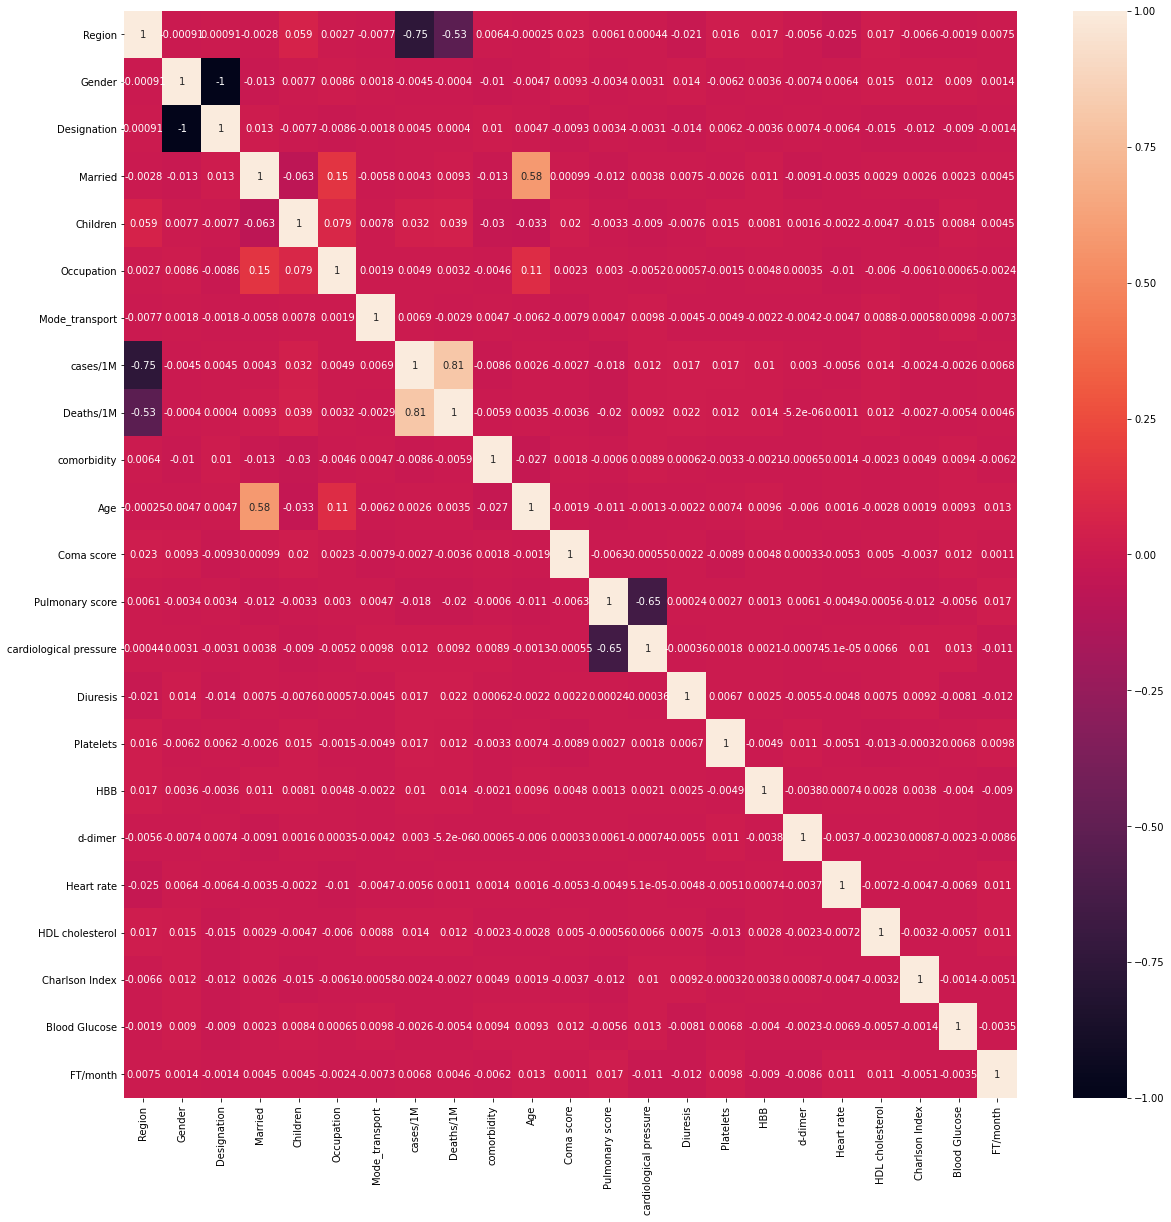

In [10]:
# Visualising correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(cm, annot=True)

In [13]:
X=dat.drop(["Infect_Prob"],  axis=1)
y=dat["y_category"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [18]:
X_train.shape
X_test.shape

(2143, 24)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

1.0


In [20]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.9976668222118525


In [21]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.9855342977134858


/home/ubuntu/.virtualenvs/deeplearning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


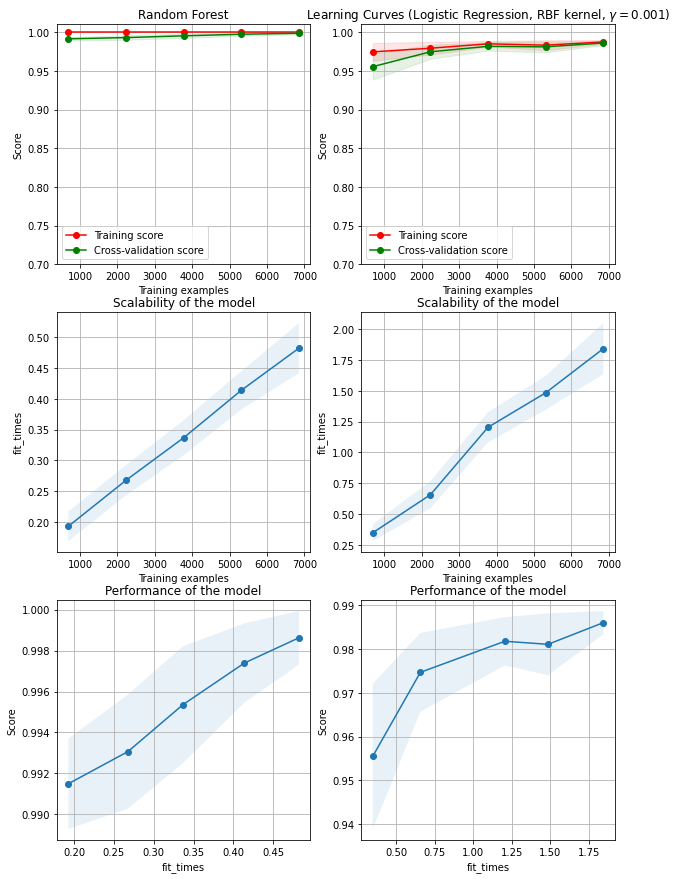

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Training Time(seconds)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Training Time(seconds)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Random Forest"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Logistic Regression"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()